In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

In [3]:
df_sissi = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/MXfold2_Excel/sissi.xlsx"))
df_sissiz_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/MXfold2_Excel/sissiz_mono.xlsx"))
df_sissiz_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/MXfold2_Excel/sissiz_di.xlsx"))
df_multiperm_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/MXfold2_Excel/multiperm_mono.xlsx"))
df_multiperm_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/MXfold2_Excel/multiperm_di.xlsx"))
df_aln_shuffle = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/MXfold2_Excel/alifoldz.xlsx"))

In [ ]:
# df_sissi = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/MXfold2_Excel/sissi.xlsx"))
# df_sissiz_mono = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/MXfold2_Excel/sissiz_mono.xlsx"))
# df_sissiz_di = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/MXfold2_Excel/sissiz_di.xlsx"))
# df_multiperm_mono = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/MXfold2_Excel/multiperm_mono.xlsx"))
# df_multiperm_di = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/MXfold2_Excel/multiperm_di.xlsx"))
# df_aln_shuffle = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/MXfold2_Excel/alifoldz.xlsx"))

In [6]:
df_sissi[['Score']].describe()

,Score
count,100000.000000
mean,9.427275
std,4.628566
min,-4.100000
25%,6.100000
50%,9.150000
75%,12.400000
max,35.550000


In [7]:
df_sissiz_mono[['Score']].describe()

,Score
count,100000.000000
mean,3.882584
std,2.686217
min,-4.000000
25%,2.000000
50%,3.750000
75%,5.600000
max,18.550000


In [8]:
df_sissiz_di[['Score']].describe()

,Score
count,100000.000000
mean,4.594874
std,2.874202
min,-4.050000
25%,2.600000
50%,4.450000
75%,6.450000
max,18.250000


In [9]:
df_multiperm_mono[['Score']].describe()

,Score
count,100000.000000
mean,4.806598
std,1.809629
min,-1.150000
25%,3.550000
50%,4.700000
75%,6.000000
max,13.900000


In [10]:
df_multiperm_di[['Score']].describe()

,Score
count,100000.000000
mean,4.659880
std,1.848398
min,-2.150000
25%,3.400000
50%,4.600000
75%,5.850000
max,15.800000


In [11]:
df_aln_shuffle[['Score']].describe()

,Score
count,100000.000000
mean,7.943279
std,1.762818
min,1.500000
25%,6.750000
50%,7.950000
75%,9.100000
max,15.350000


C:\Users\Stefan\AppData\Local\Temp\ipykernel_12000\1326043821.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
C:\Users\Stefan\AppData\Local\Temp\ipykernel_12000\1326043821.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
C:\Users\Stefan\AppData\Local\Temp\ipykernel_12000\1326043821.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
C:\Users\Stefan\AppData\Local\Temp\ipykernel_12000\1326043821.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurpl

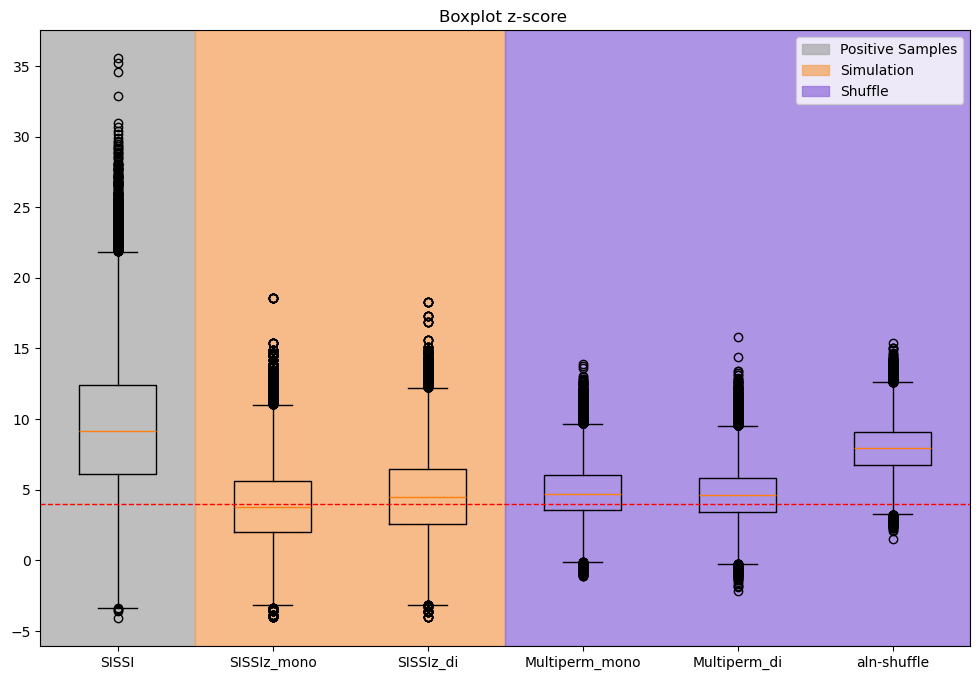

In [4]:
dataframes = [df_sissi, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Score'] for df in dataframes]
thresholds = [4]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1)

plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')

plt.title('Boxplot z-score ')
plt.legend()
plt.show()